# <font color='#936747'> loan </font> </font>


#### This is a credit history of the customers from a financial institution.
#### Agenda is to predict for possible credit defaulters upfront and help the financial institutions
####  to take steps accordingly.

**<font color='#592720'>There are 13 variables in this data set:<font>**

 <b><p>8 categorical variables</p>
    <p>4 continuous variables, and</p>
    <p>1 variable to accommodate the loan ID.</p></b>


#   <font color='#936747'>Import Libraries</font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno   # i use it to visual missing vals in dataset

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# <font color='#936747'>Loading Data</font>

In [ ]:
L1 = pd.read_csv('\\Users\\DELL\\Downloads\\loan.csv')
L1.head(5).style.set_caption("loan Dataset")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,nan,360.000000,1.000000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.000000,1.000000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.000000,360.000000,1.000000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.000000,1.000000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.000000,360.000000,1.000000,Urban,Y


In [ ]:

L1.describe().style.background_gradient(axis=0) #Shading the values column-wise  with axis=0

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,525.000000,525.000000,506.000000,513.000000,483.000000
mean,5347.470476,1644.652952,149.262846,342.456140,0.855072
std,5400.249465,2886.846621,89.118700,66.858428,0.352393
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2929.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1250.000000,128.000000,360.000000,1.000000
75%,5746.000000,2336.000000,172.000000,360.000000,1.000000
max,63337.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
print(L1.shape) #features(columns) and rows

(525, 13)


<b>
<p>Loan_ID : Unique Loan ID</p>
<p>Gender : Male/ Female</p>
<p>Married : Applicant married (Y/N)</p>
<p>Dependents : Number of dependents </p>
<p>Education : Applicant Education (Graduate/ Under Graduate)</p>
<p>Self_Employed : Self employed (Y/N)</p>
<p>ApplicantIncome : Applicant income</p>
<p>CoapplicantIncome : Coapplicant income</p>
<p>LoanAmount : Loan amount in thousands of dollars</p>
<p>Loan_Amount_Term : Term of loan in months</p>
<p>Credit_History : credit history meets guidelines yes or no</p>
<p>Property_Area : Urban/ Semi Urban/ Rural</p>
<p>Loan_Status : Loan approved (Y/N) this is the target variable</b>

# <font color='#936747'>Explore Data</font>



In [ ]:
L1.describe().style.background_gradient(axis=0)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,525.000000,525.000000,506.000000,513.000000,483.000000
mean,5347.470476,1644.652952,149.262846,342.456140,0.855072
std,5400.249465,2886.846621,89.118700,66.858428,0.352393
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2929.000000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1250.000000,128.000000,360.000000,1.000000
75%,5746.000000,2336.000000,172.000000,360.000000,1.000000
max,63337.000000,41667.000000,700.000000,480.000000,1.000000


In [ ]:
L1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525 entries, 0 to 524
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            525 non-null    object 
 1   Gender             514 non-null    object 
 2   Married            523 non-null    object 
 3   Dependents         511 non-null    object 
 4   Education          525 non-null    object 
 5   Self_Employed      499 non-null    object 
 6   ApplicantIncome    525 non-null    int64  
 7   CoapplicantIncome  525 non-null    float64
 8   LoanAmount         506 non-null    float64
 9   Loan_Amount_Term   513 non-null    float64
 10  Credit_History     483 non-null    float64
 11  Property_Area      525 non-null    object 
 12  Loan_Status        525 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 53.4+ KB


**<h3>Loan Id</h3>**

In [ ]:

#  drop load_id  is not needed
L1= L1.drop('Loan_ID',axis=1)

##### <font color='#592720'><i><b>Explore features</b></i></font>
#####

**<h3>2 Gender</h3>**

In [ ]:
L1.Gender.value_counts()

Male      420
Female     94
Name: Gender, dtype: int64

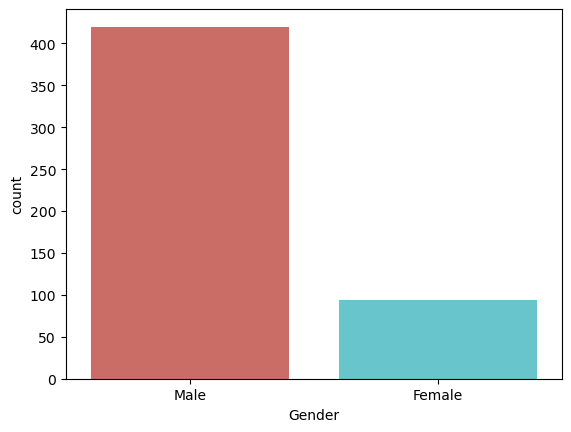

In [ ]:
#show data
sns.countplot(x="Gender", data=L1, palette="hls",color="salmon")
plt.show()

In [ ]:
print("Percentage of Male applicant: {:.2f}%".format((len(L1[L1.Gender == 'Male'])/ (len(L1.Gender))*100)))
print("Percentage of Female applicant: {:.2f}%".format(( len(L1[L1.Gender == 'Female']) / (len(L1.Gender))*100)))
print("Missing values percentage: {:.2f}%".format((len(L1[L1.Gender.isnull()]) / (len(L1.Gender))*100)))

Percentage of Male applicant: 80.00%
Percentage of Female applicant: 17.90%
Missing values percentage: 2.10%


**<h3>2 Married</h3>**

In [ ]:
L1['Married'].value_counts()

Yes    344
No     179
Name: Married, dtype: int64

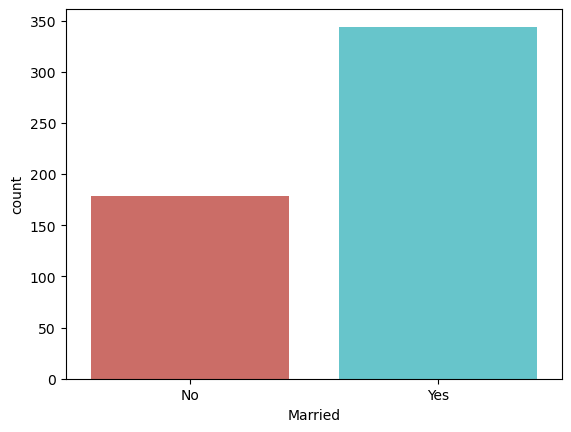

In [ ]:
#show data
sns.countplot(x="Married", data=L1, palette="hls",color="salmon")
plt.show()

**<h3>4 Dependents</h3>**

In [ ]:
L1['Dependents'].value_counts()

0     290
1      89
2      88
3+     44
Name: Dependents, dtype: int64

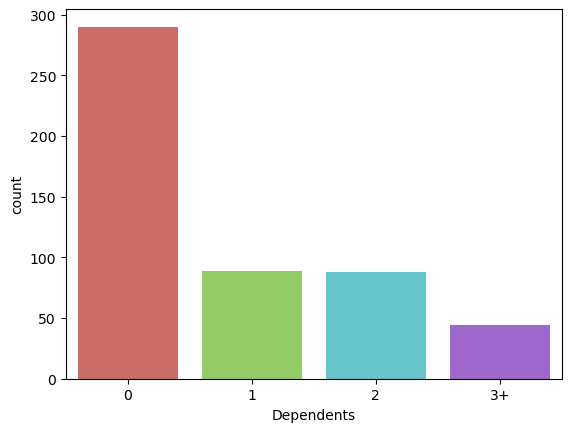

In [ ]:
#show data
sns.countplot(x="Dependents", data=L1, palette="hls",color="salmon")
plt.show()

In [ ]:
L1=L1.replace(to_replace="3+",value=4)

**<h3>5 Education</h3>**

In [ ]:
L1.Education.value_counts()

Graduate        417
Not Graduate    108
Name: Education, dtype: int64

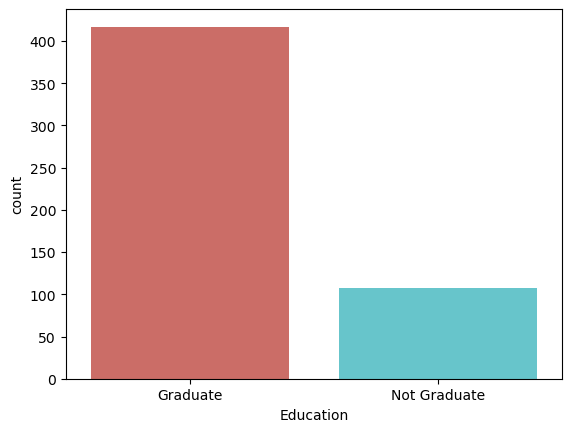

In [ ]:
#show data
sns.countplot(x="Education", data=L1, palette="hls",color="salmon")
plt.show()

**<h3>6 Self_Employed</h3>**

In [ ]:
L1['Self_Employed'].value_counts()

No     429
Yes     70
Name: Self_Employed, dtype: int64

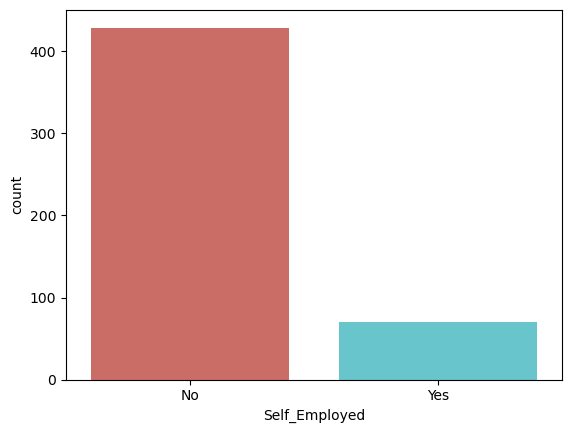

In [ ]:
#show data
sns.countplot(x="Self_Employed", data=L1, palette="hls",color="salmon")
plt.show()

**<h3>7 ApplicantIncome</h3>**

In [ ]:
L1['ApplicantIncome'].value_counts()

2500    7
4583    6
6000    5
3333    5
5000    5
       ..
3497    1
4344    1
5708    1
3522    1
7583    1
Name: ApplicantIncome, Length: 437, dtype: int64

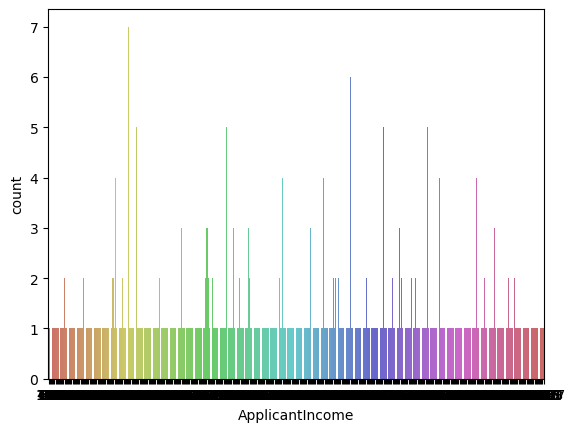

In [ ]:
#show data
sns.countplot(x="ApplicantIncome", data=L1, palette="hls")
plt.show()

**<h3>8 CoapplicantIncome</h3>**

In [ ]:
L1['CoapplicantIncome'].value_counts()

0.0        228
2500.0       5
2083.0       5
1666.0       4
2250.0       3
          ... 
11300.0      1
7250.0       1
5063.0       1
2138.0       1
240.0        1
Name: CoapplicantIncome, Length: 253, dtype: int64

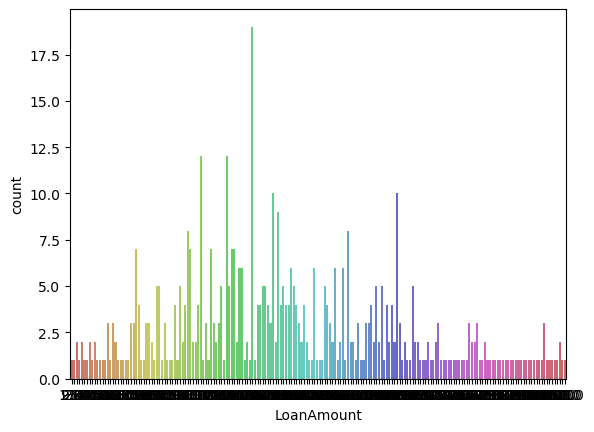

In [ ]:
#show data
sns.countplot(x="LoanAmount", data=L1, palette="hls",color="salmon")
plt.show()

**<h3>9 LoanAmount</h3>**

In [ ]:
L1['LoanAmount'].value_counts()

120.0    19
110.0    12
100.0    12
128.0    10
187.0    10
         ..
83.0      1
164.0     1
48.0      1
58.0      1
253.0     1
Name: LoanAmount, Length: 192, dtype: int64

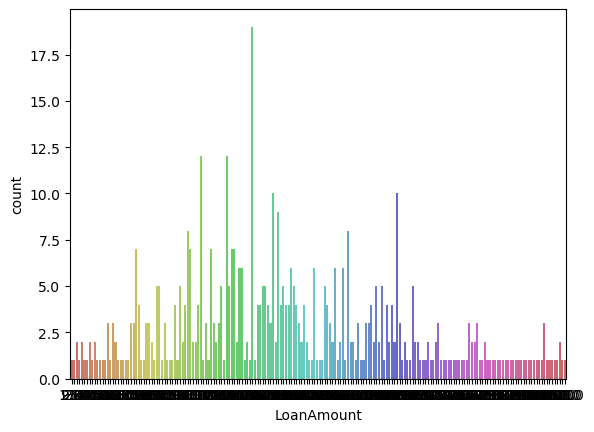

In [ ]:
#show data
sns.countplot(x="LoanAmount", data=L1, palette="hls",color="salmon")
plt.show()

**<h3>10 Loan_Amount_Term</h3>**

In [ ]:
L1['Loan_Amount_Term'].value_counts()

360.0    438
180.0     36
480.0     15
300.0      9
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

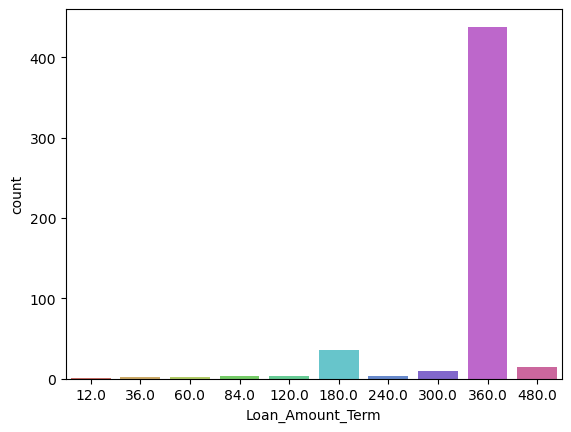

In [ ]:
#show data
sns.countplot(x="Loan_Amount_Term", data=L1, palette="hls",color="salmon")
plt.show()

**<h3>11 Credit_History</h3>**

In [ ]:
L1['Credit_History'].value_counts()

1.0    413
0.0     70
Name: Credit_History, dtype: int64

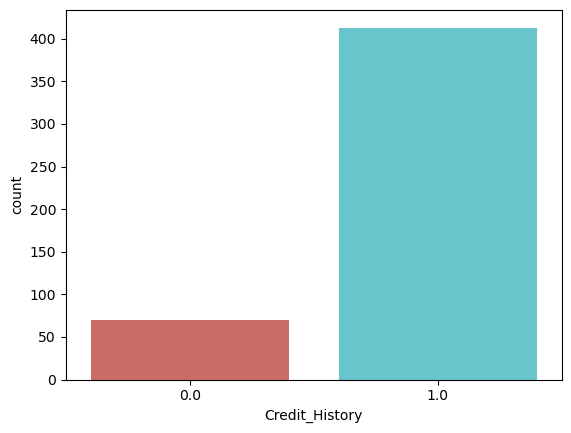

In [ ]:
#show data
sns.countplot(x="Credit_History", data=L1, palette="hls",color="salmon")
plt.show()

**<h3>12 Property_Area</h3>**

In [ ]:
L1['Property_Area'].value_counts()

Semiurban    201
Urban        175
Rural        149
Name: Property_Area, dtype: int64

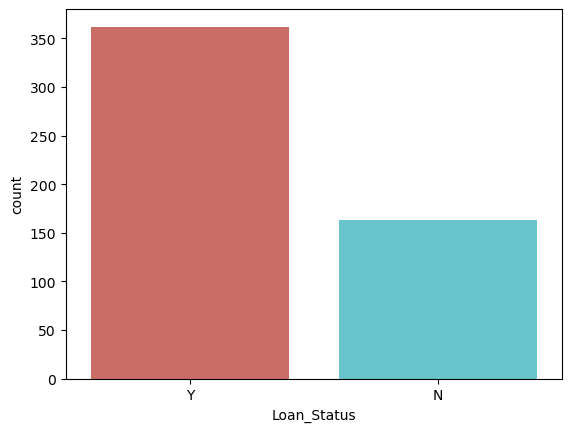

In [ ]:
#show data
sns.countplot(x="Loan_Status", data=L1, palette="hls",color="salmon")
plt.show()

**<h3>14 Loan_Status</h3>**

In [ ]:
L1.Loan_Status.value_counts()

Y    362
N    163
Name: Loan_Status, dtype: int64

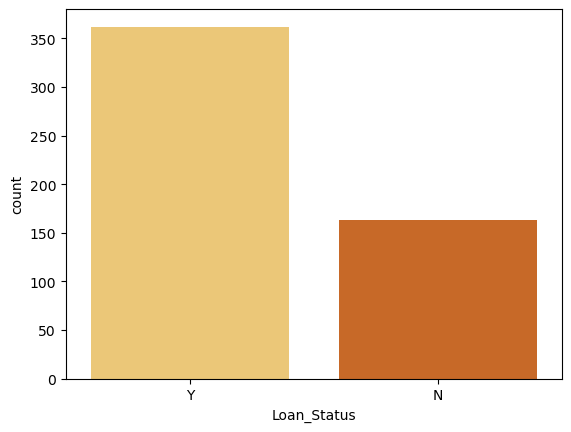

In [ ]:
sns.countplot(x="Loan_Status", data=L1, palette="YlOrBr")
plt.show()

**<h3> Preprocessing </h3>**

In [ ]:
L1['Dependents'].value_counts()

0    290
1     89
2     88
4     44
Name: Dependents, dtype: int64

In [ ]:
#replacing 3+ to 4
L1=L1.replace(to_replace="3+",value=4)
L1["Dependents"].value_counts()

0    290
1     89
2     88
4     44
Name: Dependents, dtype: int64

In [ ]:
L1['Dependents']=pd.to_numeric(L1['Dependents'])

#
# <font color='#592720'>Display Missing Values</font>
#


In [ ]:
L1.isnull().sum()  # show null val

Gender               11
Married               2
Dependents           14
Education             0
Self_Employed        26
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           19
Loan_Amount_Term     12
Credit_History       42
Property_Area         0
Loan_Status           0
dtype: int64

# Replace the missing values for numerical columns with mean




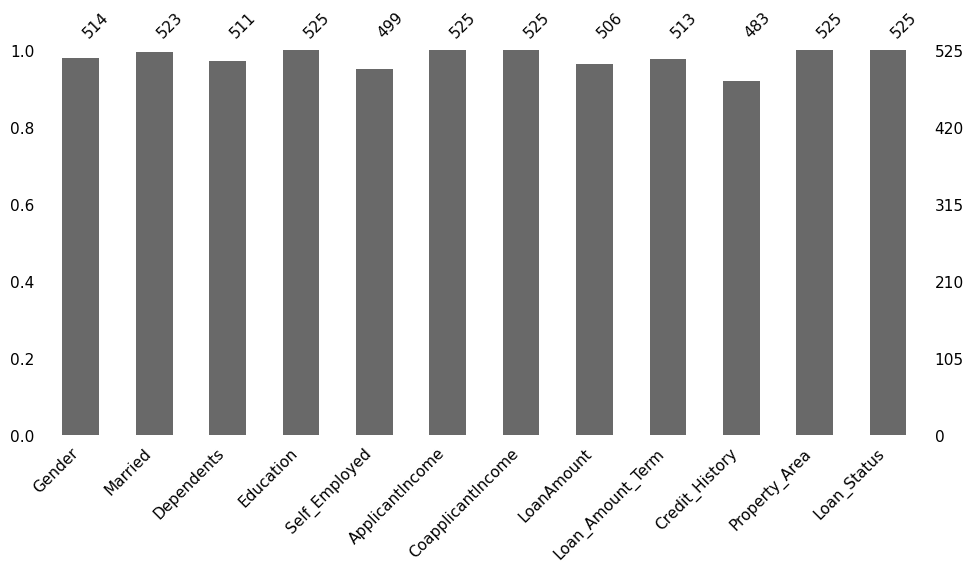

In [ ]:
plt.figure(figsize = (25, 5))
ax1 = plt.subplot(1,2,2)
msno.bar(L1, ax = ax1, fontsize = 11);

###### Effective Strategies for Handling Missing Values in Data Analysis:
###### 1.Deleting the entire column
###### 2.Imputing the Missing Value
###### (Replacing with the mode-median- forward fill-backward fill)

**<font color='blue'>Get Rid of all null Val 👍</font>**

**continuous features**

In [ ]:
#Imputing Missing values with mean for continuous variable
L1['LoanAmount'].fillna(L1['LoanAmount'].mean(), inplace=True)


**Categorical features**

In [ ]:
#Replace Missing values with mode for categorical variables
L1['Gender'].fillna(L1['Gender'].mode()[0], inplace=True)
L1['Married'].fillna(L1['Married'].mode()[0], inplace=True)
L1['Dependents'].fillna(L1['Dependents'].mode()[0], inplace=True)
L1['Loan_Amount_Term'].fillna(L1['Loan_Amount_Term'].mode()[0], inplace=True)
L1['Credit_History'].fillna(L1['Credit_History'].mode()[0], inplace=True)
L1['Self_Employed'].fillna(L1['Self_Employed'].mode()[0],inplace=True)

<AxesSubplot:>

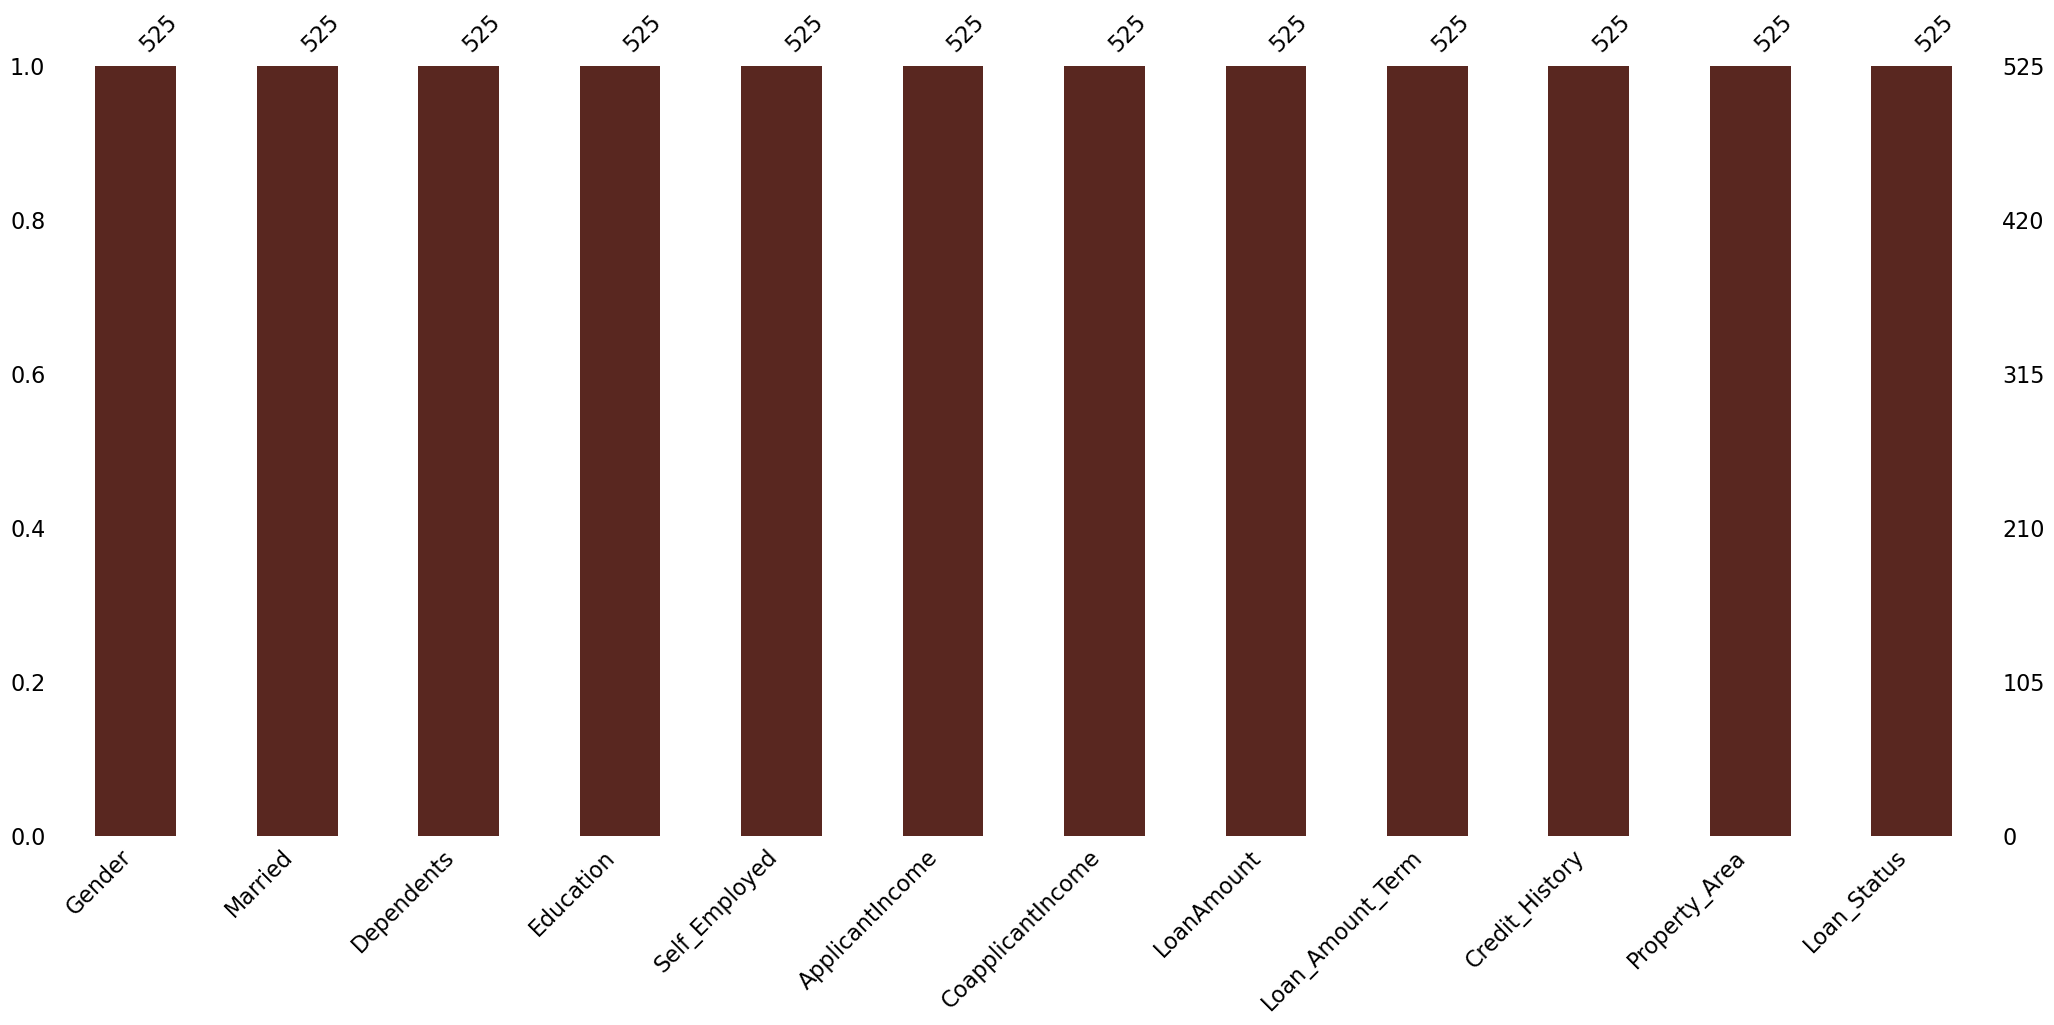

In [ ]:
msno.bar(L1,color='#592720')

In [ ]:
L1.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
display(L1.value_counts())

Gender  Married  Dependents  Education     Self_Employed  ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Loan_Status
Female  No       0.0         Graduate      No             645              3683.0             113.0       480.0             1.0             Rural          Y              1
Male    Yes      1.0         Graduate      No             3875             0.0                67.0        360.0             1.0             Urban          N              1
                                                          3717             2925.0             151.0       360.0             1.0             Semiurban      N              1
                                                          3417             1750.0             186.0       360.0             1.0             Urban          Y              1
                                                          3400             2500.0             173.0       360.0             1.0             Semiu

In [ ]:
L1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
520    False
521    False
522    False
523    False
524    False
Length: 525, dtype: bool

In [ ]:
L1.drop_duplicates()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,149.262846,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
520,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
521,Male,Yes,4.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
522,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
523,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


##
## <font color='#936747'>Visualiztion</font>
##

**Histogram Distribution**

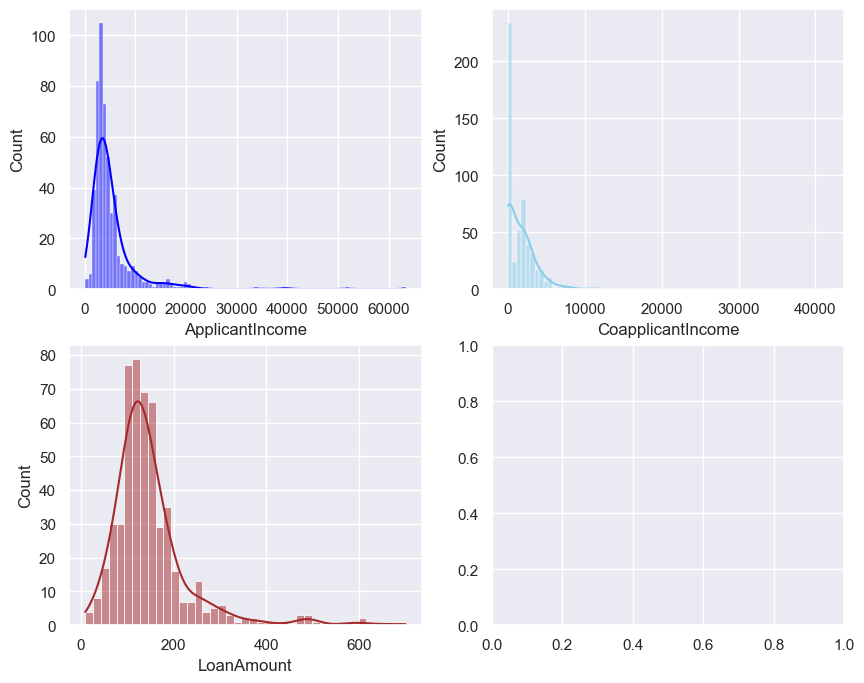

In [ ]:
#the distribution of numerical variable using histogram


sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=L1, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='blue')
sns.histplot(data=L1, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=L1, x="LoanAmount", kde=True, ax=axs[1, 0], color='brown');

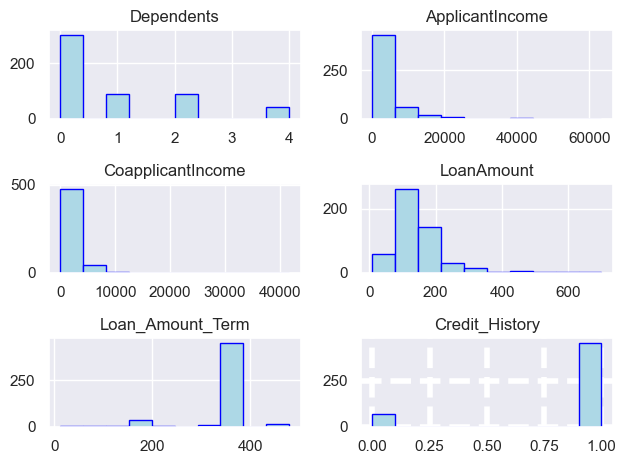

In [ ]:
#histogram to dataset...

L1.hist(color = "lightblue", ec="blue")
plt.tight_layout()
plt.grid(True, linewidth= 4, linestyle="--")
plt.show()

**The distribution of**
**<font color='blue'><b>[Applicant income, Co Applicant Income, and Loan Amount]</b></font>----->positively skewed and **


**The distribution of**
**<font color='blue'>[Loan Amount Term]</font> -------------> negativly skewed**

**pie chart**

**Gender**

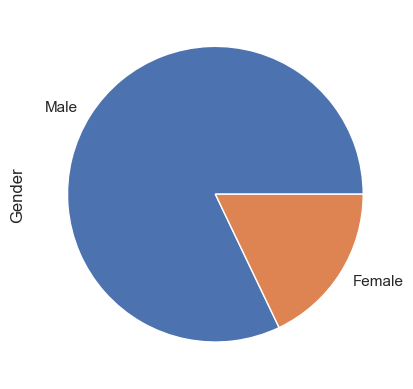

In [ ]:
L1['Gender'].value_counts().head(20).plot.pie()

plt.gca().set_aspect('equal')

**LOAN_STATUS**

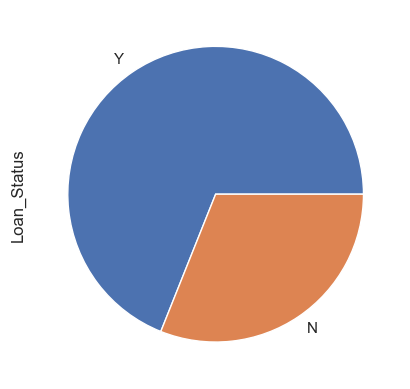

In [ ]:
L1['Loan_Status'].value_counts().head(20).plot.pie()

plt.gca().set_aspect('equal')

**Bar**

<BarContainer object of 2 artists>

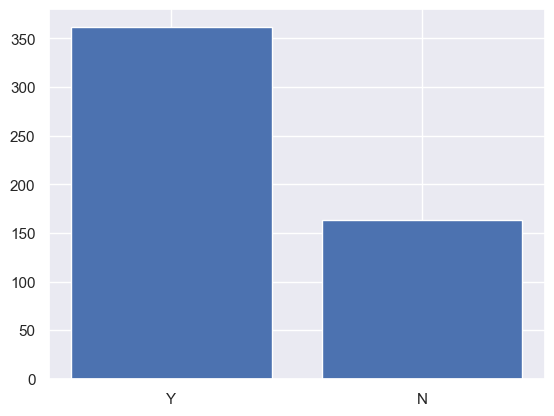

In [ ]:
s = pd.Series(L1['Loan_Status'])
plt.bar(s.unique(), s.value_counts())

<b><h4>Married vs Gender</h4></b>

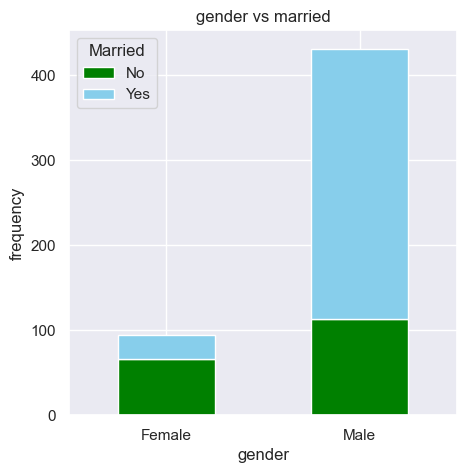

In [ ]:
#compare married and gender using crosstab
pd.crosstab(L1.Gender,L1.Married).plot(kind="bar", stacked=True, figsize=(5,5), color=['green','skyblue'])
plt.title('gender vs married')
plt.xlabel('gender')
plt.ylabel('frequency')
plt.xticks(rotation=0)
plt.show()

**Most male are  married than female applicants.
not married male applicants > female applicants that had not married.**

**Self Employed vs Credit History**

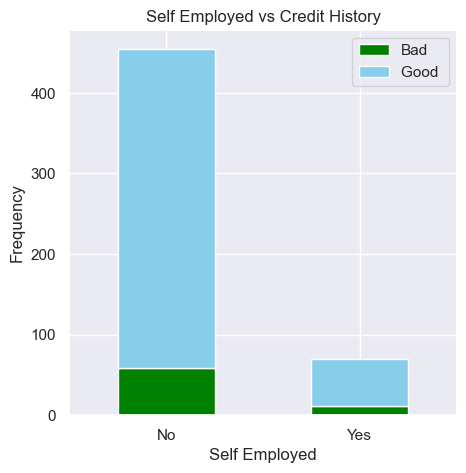

In [ ]:
#compare married and gender using crosstab
pd.crosstab(L1.Self_Employed,L1.Credit_History).plot(kind="bar", stacked=True, figsize=(5,5), color=['green','skyblue'])
plt.title('Self Employed vs Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Frequency')
plt.legend(["Bad","Good "])
plt.xticks(rotation=0)
plt.show()

**not self employed applicants have good credit than  to self employed applicants.**

<h3><b>Self Employed vs Credit History</b></h3>

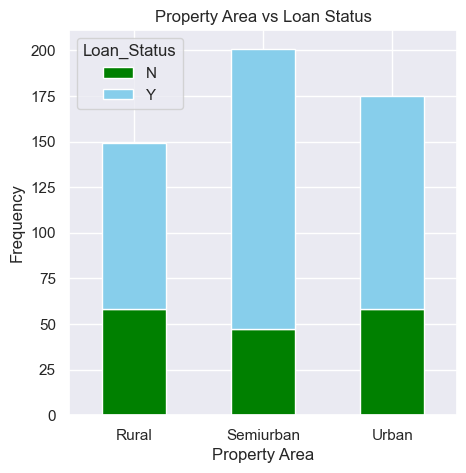

In [ ]:
pd.crosstab(L1.Property_Area,L1.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['green','skyblue'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<b><h3>Property Area vs Loan Status</h3></b>

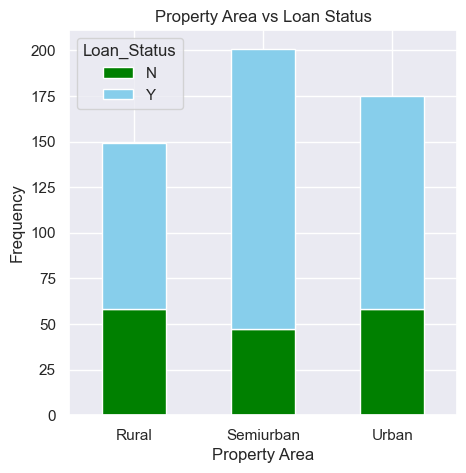

In [ ]:
pd.crosstab(L1.Property_Area,L1.Loan_Status).plot(kind="bar", stacked=True, figsize=(5,5), color=['green','skyblue'])
plt.title('Property Area vs Loan Status')
plt.xlabel('Property Area')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

<h3>Loan_amount_term Vs ApplicantIncome</h3>

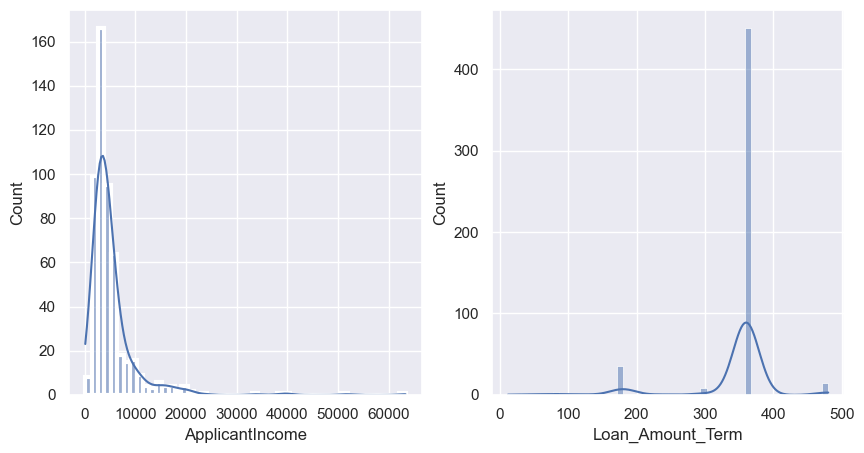

In [ ]:
fig, ax1=plt.subplots(1,2,figsize=(10,5))
sns.histplot(x=L1['ApplicantIncome'],bins=50,data=L1,kde=True,ax=ax1[0],linewidth=3)
sns.histplot(x=L1['Loan_Amount_Term'],bins=50,data=L1,kde=True,ax=ax1[1],linewidth=.5)
plt.show()

###
### **Heatmap**
###

<AxesSubplot:>

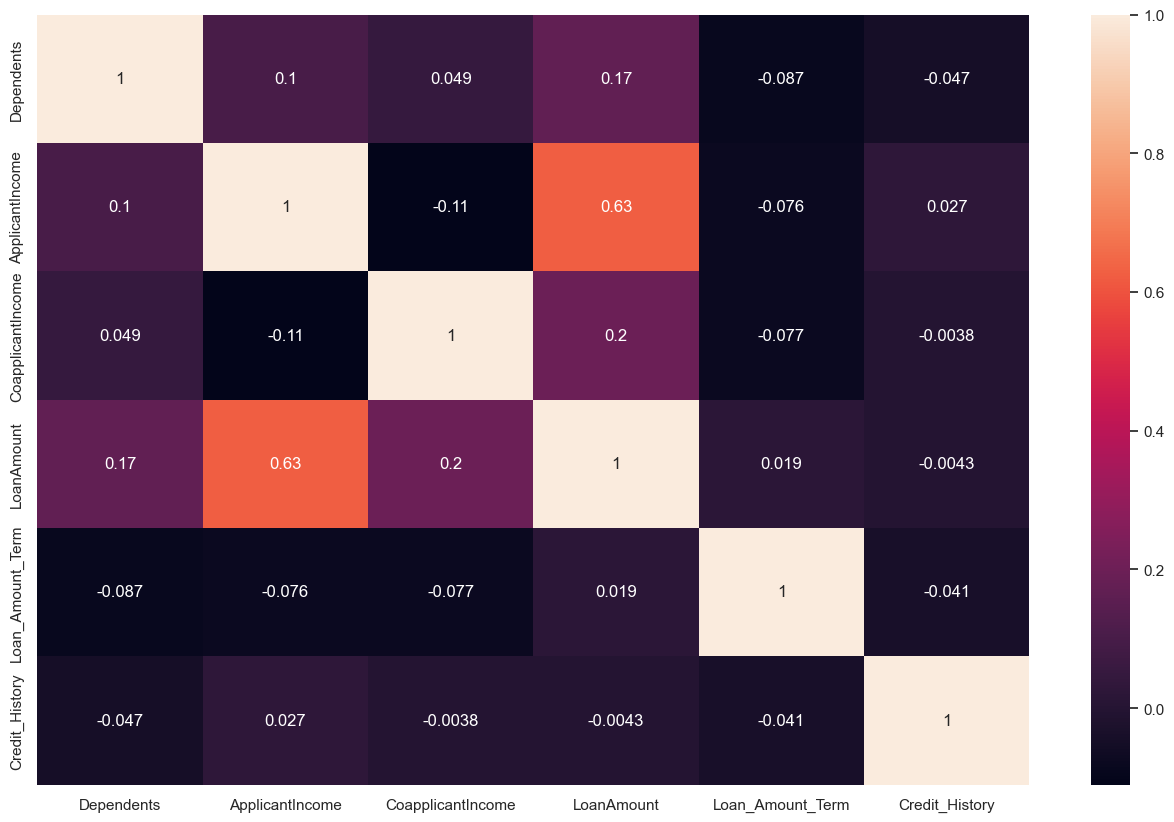

In [ ]:
corr = L1.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr,annot=True)

**positive  relation between **[Loan Amount , Applicant Income]****

**ApplicantIncome**

<AxesSubplot:>

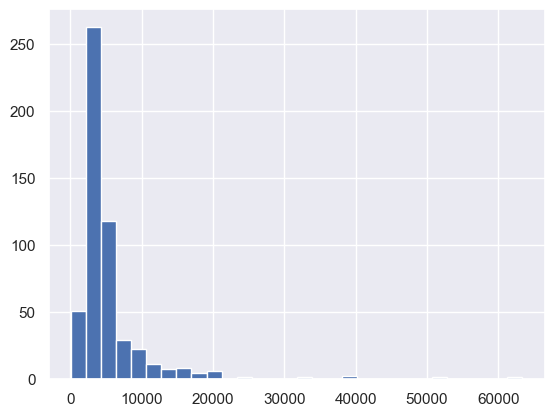

In [ ]:
L1['ApplicantIncome'].hist(bins=30)

**LoanAmount**

<AxesSubplot:>

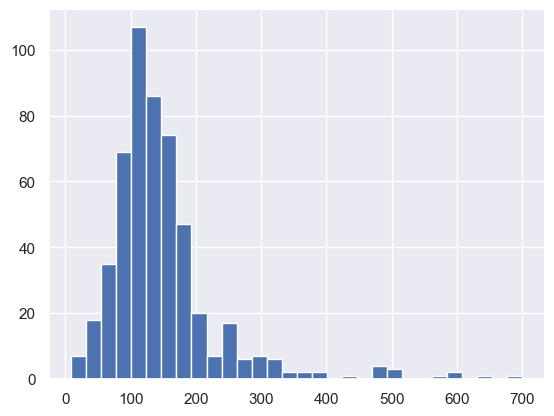

In [ ]:
L1['LoanAmount'].hist(bins=30)

**BoxPlot**

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

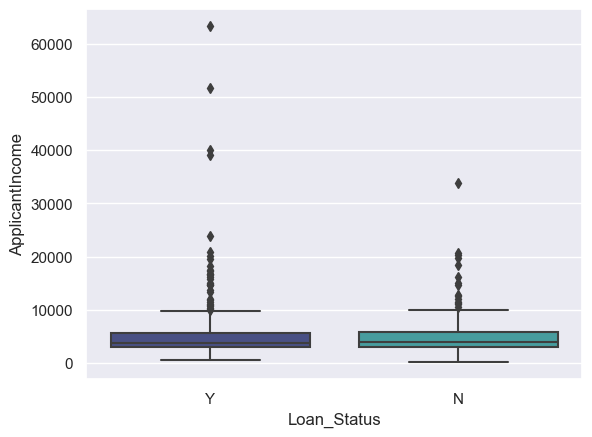

In [ ]:
sns.boxplot(data=L1,x='Loan_Status',y='ApplicantIncome',palette='mako')

**Education & Loan_Status**

<AxesSubplot:xlabel='Education', ylabel='count'>

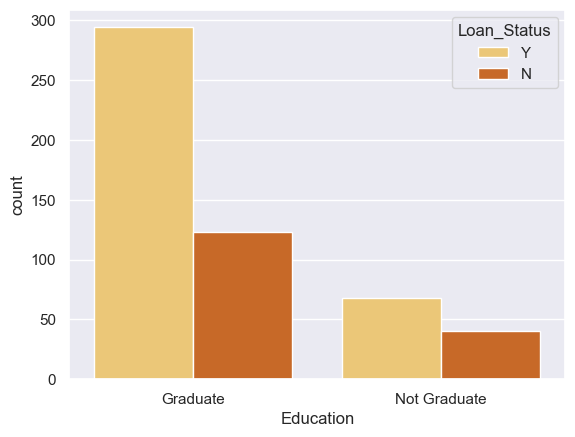

In [ ]:
sns.countplot(x='Education',hue='Loan_Status',data=L1,palette='YlOrBr')

**CountPlot**

<AxesSubplot:xlabel='Married', ylabel='count'>

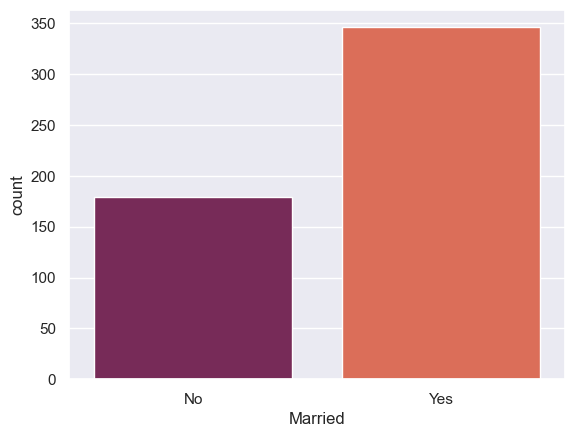

In [ ]:
sns.countplot(x='Married',data=L1,palette='rocket')

# <font color='#936747'>Numarical Data</font>

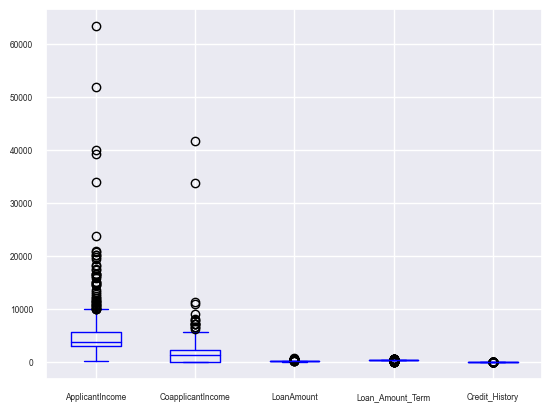

In [ ]:
df_colums_nums=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

boxplot =L1.boxplot(column=df_colums_nums, grid=True, fontsize=6,color='blue')

In [ ]:
i_to_drop=L1[(L1['ApplicantIncome']>30000) | (L1['CoapplicantIncome']>=8000)].index
L1.drop(index=i_to_drop,inplace=True,axis=0)
L1.reset_index(inplace=True,drop=True)
L1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,149.262846,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
510,Male,Yes,4.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
511,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
512,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [ ]:
L1.drop_duplicates()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,149.262846,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
509,Female,No,0.0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
510,Male,Yes,4.0,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
511,Male,Yes,1.0,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
512,Male,Yes,2.0,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


**have to work on outlies**

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

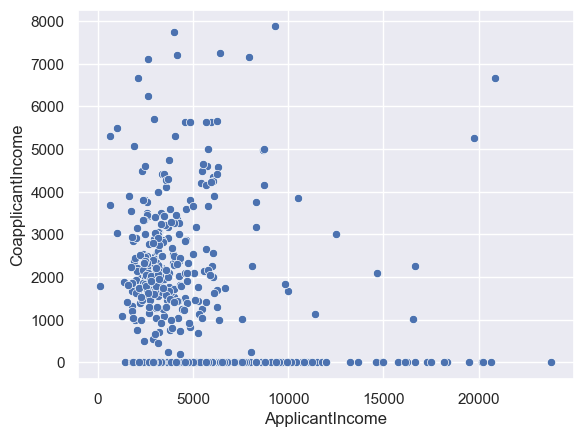

In [ ]:
#have to work on outlies
applicant_income=L1['ApplicantIncome']
co_applicant_income=L1['CoapplicantIncome']
sns.scatterplot(x=applicant_income,y=co_applicant_income)

###
### <font color='#936747'> Distribuation to each numarical feature </font>
###
###

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

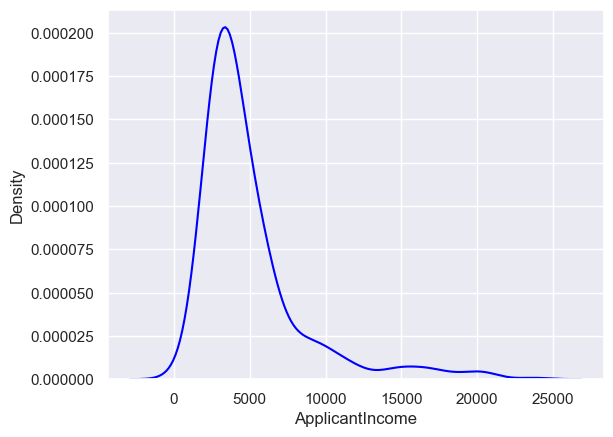

In [ ]:
sns.kdeplot(L1["ApplicantIncome"],color='blue')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

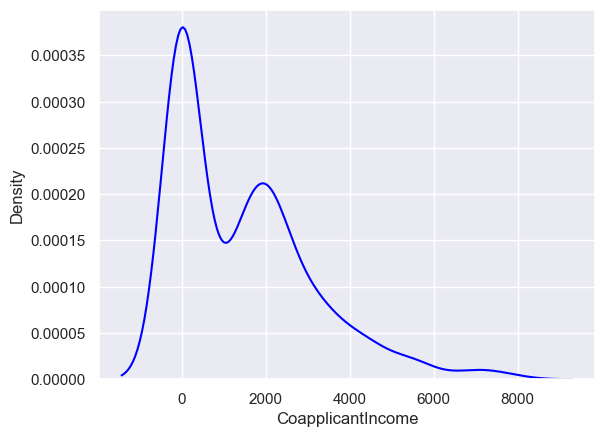

In [ ]:
sns.kdeplot(L1["CoapplicantIncome"],color='blue')

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

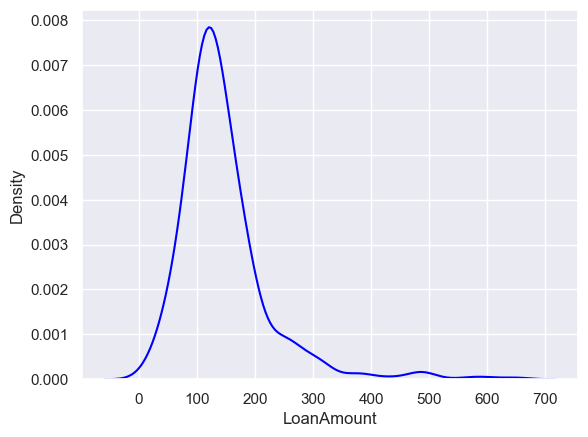

In [ ]:
sns.kdeplot(L1["LoanAmount"],color='blue')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

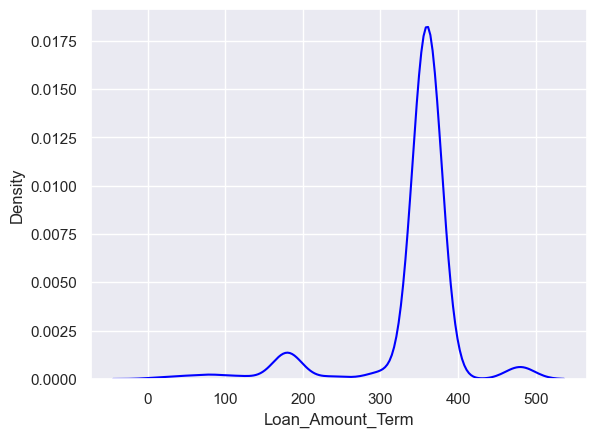

In [ ]:
sns.kdeplot(L1["Loan_Amount_Term"],color='blue')

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

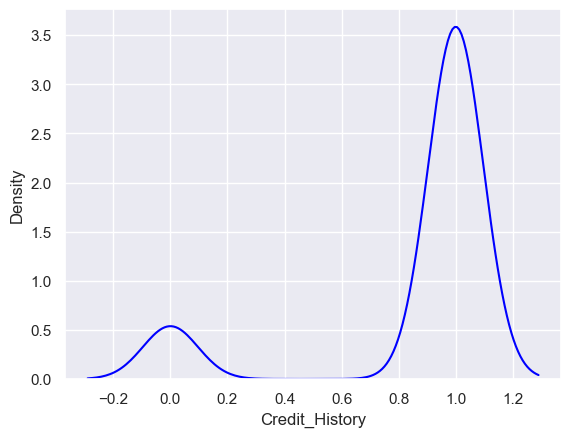

In [ ]:
sns.kdeplot(L1["Credit_History"],color='blue')

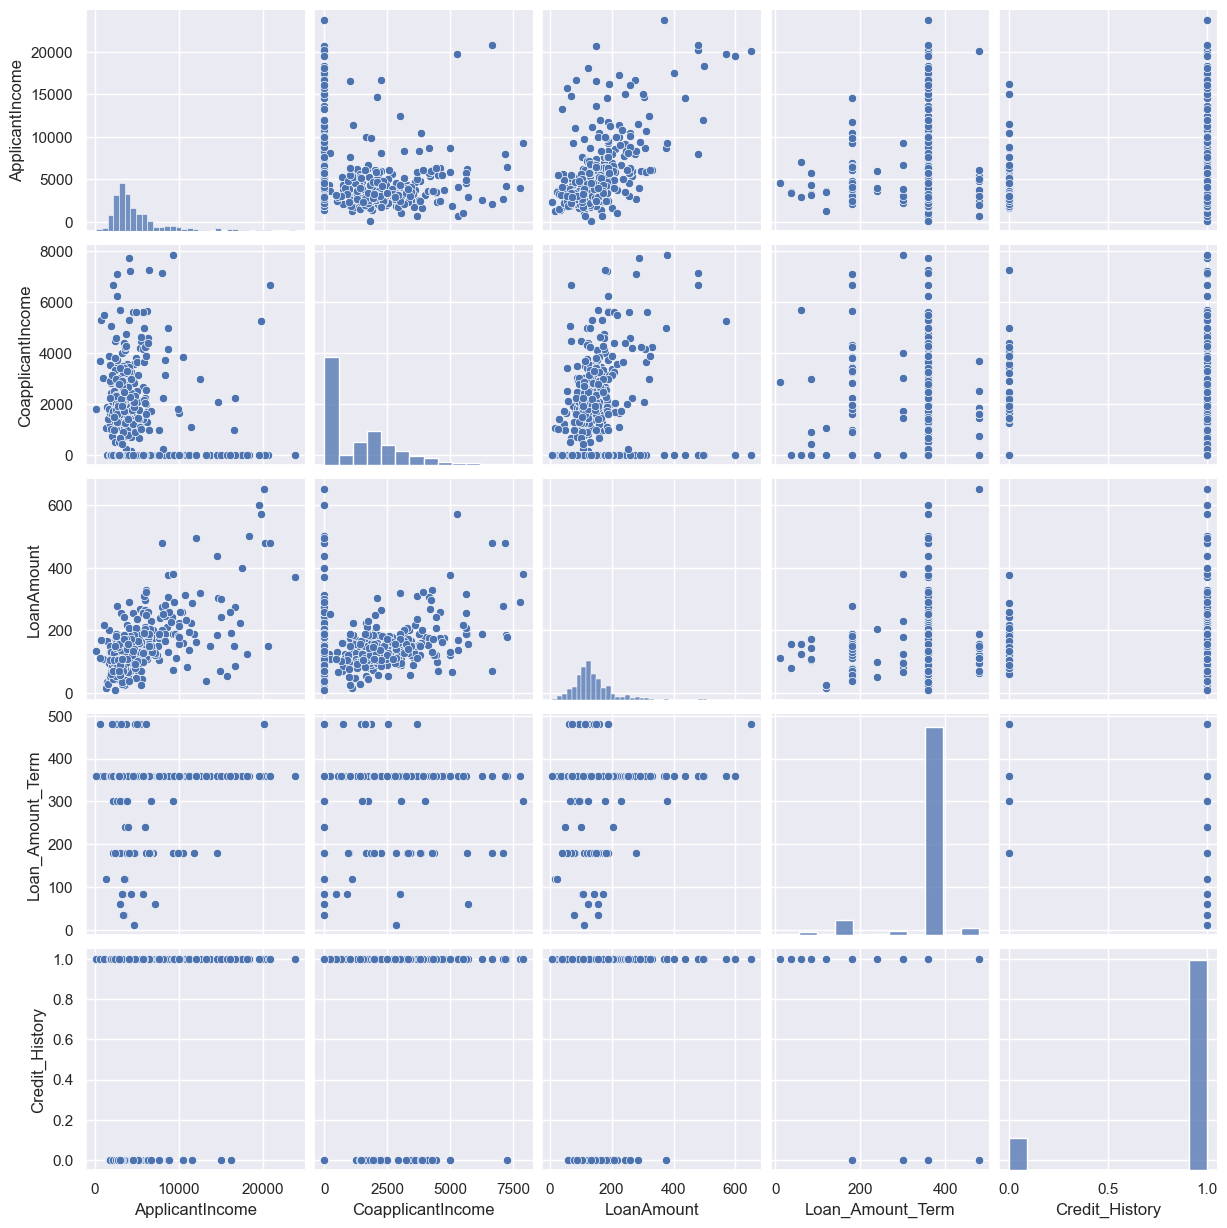

In [ ]:
sns.pairplot(L1[df_colums_nums])
plt.show()

## <font color='#936747'>one hot Encoding</font>
##
##

In [ ]:
L1= pd.get_dummies(L1)
# Drop columns
L1 = L1.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}

L1.rename(columns=new, inplace=True)

#-------------------------------------------------------------------------------------------



L1.head().style.background_gradient(axis=0)



,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,0.000000,5849,0.000000,149.262846,360.000000,1.000000,1,0,1,0,0,0,1,1
1,1.000000,4583,1508.000000,128.000000,360.000000,1.000000,1,1,1,0,1,0,0,0
2,0.000000,3000,0.000000,66.000000,360.000000,1.000000,1,1,1,1,0,0,1,1
3,0.000000,2583,2358.000000,120.000000,360.000000,1.000000,1,1,0,0,0,0,1,1
4,0.000000,6000,0.000000,141.000000,360.000000,1.000000,1,0,1,0,0,0,1,1


##
# <font color='#936747'>Outlier</font>
#

**q1=First quartile(25%)**
**q3=Third quartile(75%)**

**The IQR is  the range between the first quartile(25%) and the quartile(75%) of the L1.**


In [ ]:
Q1 = L1.quantile(0.25)
Q3 = L1.quantile(0.75)

#Calculate the IQR for  CoapplicantIncome
IQR = Q3 - Q1

#Define the lower and upper bounds for outliers
max_limit = Q3 + (1.5 * IQR)
min_limit = Q1 - (1.5 * IQR)


#Remove outliers
L1= L1[~((L1 < (min_limit)) |(L1 > (max_limit))).any(axis=1)]


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

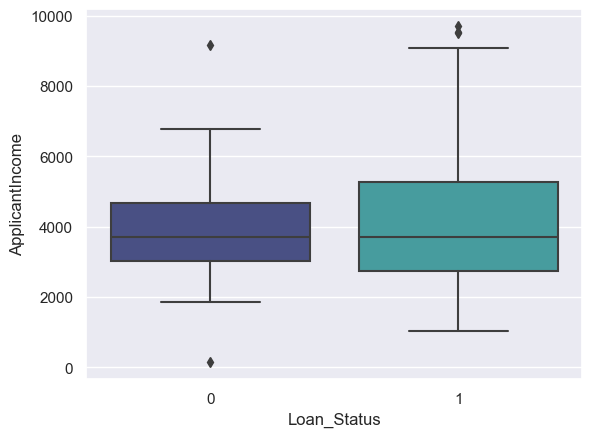

In [ ]:
sns.boxplot(data=L1,x='Loan_Status',y='ApplicantIncome',palette='mako')

In [ ]:

print("outlier Counter of the all features")
((L1 < (Q1 - 1.5 * IQR )) | (L1> (Q3 + 1.5 * IQR ))).sum()


outlier Counter of the all features


Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender                     0
Married                    0
Education                  0
Self_Employed              0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status                0
dtype: int64

## <font color='#936747'>Square Root Transformation</font>

In [ ]:
# Square Root Transformation


L1.ApplicantIncome = np.sqrt(L1.ApplicantIncome)
L1.CoapplicantIncome = np.sqrt(L1.CoapplicantIncome)
L1.LoanAmount = np.sqrt(L1.LoanAmount)

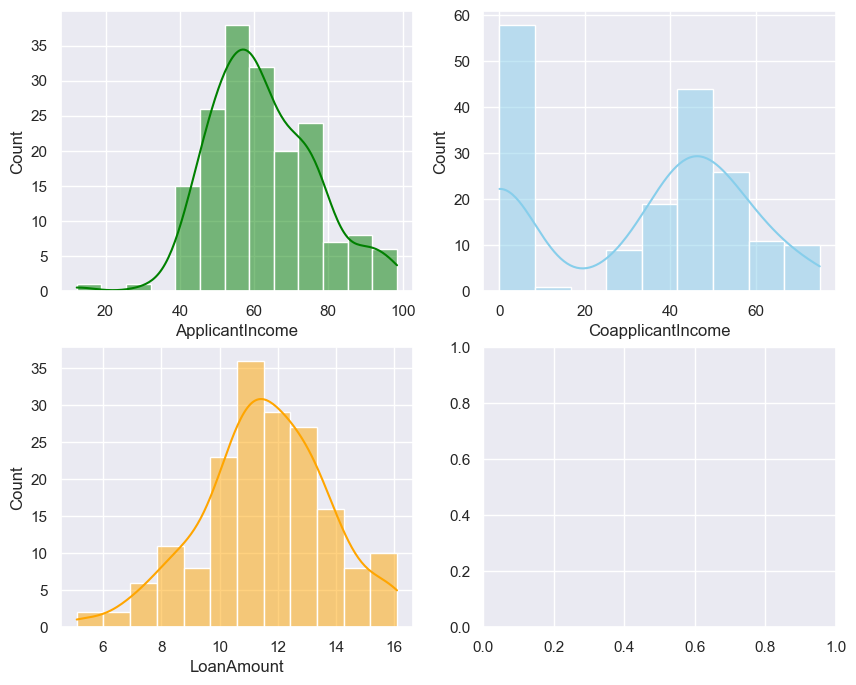

In [ ]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=L1, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=L1, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=L1, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

In [ ]:
# adding a new feature

L1['total_income']=L1['ApplicantIncome']+L1['CoapplicantIncome']

L1= L1.drop('CoapplicantIncome',axis=1)

L1= L1.drop('ApplicantIncome',axis=1)
L1.head(5)

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,total_income
0,0.0,12.217317,360.0,1.0,1,0,1,0,0,0,1,1,76.478755
1,1.0,11.313708,360.0,1.0,1,1,1,0,1,0,0,0,106.530834
4,0.0,11.874342,360.0,1.0,1,0,1,0,0,0,1,1,77.459667
8,2.0,12.961481,360.0,1.0,1,1,1,0,0,0,1,1,102.357020
9,2.0,8.366600,360.0,1.0,1,1,1,0,0,0,1,1,83.026056


#
# <font color='#936747'>Divide Data</font>
#

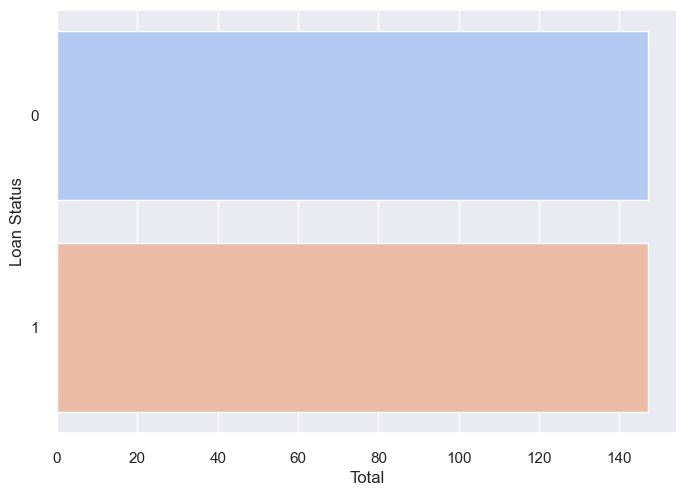

In [ ]:
#Setting values for labels and feature as X and y
X = L1.drop('Loan_Status',axis = 1)
y = L1['Loan_Status']

#
# Data imbalancing
#
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

sns.set_theme(style="darkgrid")
sns.countplot(y=y, data=L1, palette="coolwarm")
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()


#
# <font color='#936747'> Data Normalization</font>
#

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

#  
# <font color='#936747'> Split Data</font>
#

**Then data is split into the train(80%) and test(20%) data**

In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train.shape

(235, 12)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(235, 12)
(59, 12)
(235,)
(59,)


##### Number of rows in Train dataset is: 275
##### Number of columns Train dataset is 13



#  
# <font color='#936747'> Support-Vector Machine with RBF Kernel </font>


##### ****The RBF kernel ****

##### is a type of kernel function that can be used with <font color='red'>the SVM classifier</font> to transform the data <font color='red'>into a higher-dimensional </font>space, where it is easier to find a separation boundary. The RBF kernel is defined by a single parameter, <font color='red'>**gamma**</font> which determines the width of the kernel and therefore the complexity of the model. The RBF kernel function is defined as:

***K(x, y) = exp(-gamma * ||x-y||^2)***

###### <font color='red'>there are 4 popular kernels –</font>
###### 1-Linear kernel,
###### 2-Polynomial kernel,
###### 3-Radial Basis Function (RBF) kernel (also called Gaussian kernel)
###### 4-Sigmoid kernel

![Capture.PNG](attachment:Capture.PNG)

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

# # Create the SVM
svm =SVC(kernel='rbf', max_iter=100,C=10)

svm.fit(X_train, y_train)

# Predict the training and testing data
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Calculate the accuracy of the model
train_acc_svm = accuracy_score(y_train, y_train_pred)
test_acc_svm = accuracy_score(y_test, y_test_pred)


svcAcc = accuracy_score(y_test_pred,y_test)
prec_score = precision_score(y_test,y_test_pred , average='macro')
recall = recall_score(y_test,y_test_pred ,average='macro')
f1 = f1_score(y_test,y_test_pred ,average='macro')
print('SVC accuracy: {:.2f}%'.format(svcAcc*100))
print(str('Precision: '+'{:04.2f}'.format(prec_score*100))+'%')
print(str('Recall: '+'{:04.2f}'.format(recall*100))+'%')
print('F1 Score: ',f1)
print('-----------------------------------------------------------------------------------------')
print("Training accuracy of SVM: ", train_acc_svm)
print("Testing accuracy of SVM: ", test_acc_svm)
print('Confusion matrix for test \n\n',confusion_matrix(y_test,y_test_pred))

print('classification_report test \n\n',classification_report(y_test, y_test_pred))
print('classification_report train \n\n',classification_report(y_train, y_train_pred))

SVC accuracy: 88.14%
Precision: 87.76%
Recall: 88.12%
F1 Score:  0.8791337430494586
-----------------------------------------------------------------------------------------
Training accuracy of SVM:  0.8297872340425532
Testing accuracy of SVM:  0.8813559322033898
Confusion matrix for test 

 [[30  4]
 [ 3 22]]
classification_report test 

               precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.85      0.88      0.86        25

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59

classification_report train 

               precision    recall  f1-score   support

           0       0.86      0.77      0.81       113
           1       0.81      0.89      0.84       122

    accuracy                           0.83       235
   macro avg       0.83      0.83      0.83       235
weighted avg       0.83    

In [ ]:
print("Chance of overfitting for SVM: ", train_acc_svm - test_acc_svm)

Chance of overfitting for SVM:  -0.051568698160836646


In [ ]:
from sklearn.metrics import roc_curve

# roc curve for models
fp1, tp1, threshold1 = roc_curve(y_test,y_test_pred, pos_label=1)

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fp, p_tp, _ = roc_curve(y_test, random_probs, pos_label=1)

In [ ]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, y_test_pred)

print(auc_score1)

0.8811764705882352


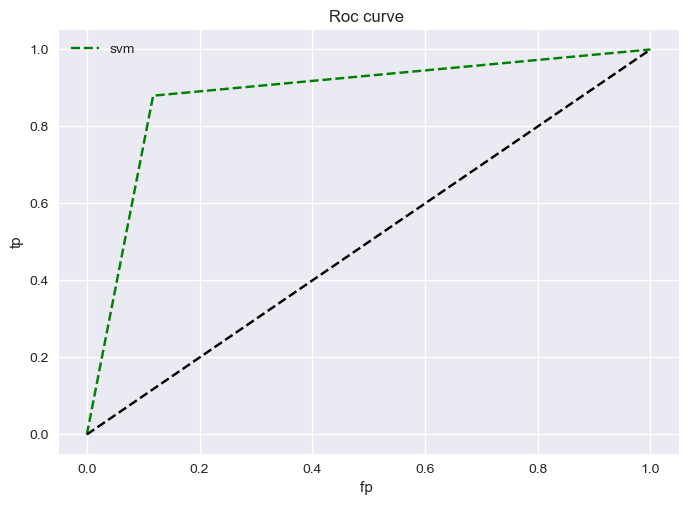

In [ ]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fp1, tp1, linestyle='--',color='green', label='svm')

plt.plot(p_fp, p_tp, linestyle='--', color='black')
# title
plt.title('Roc curve ')
# x label
plt.xlabel('fp ')
# y label
plt.ylabel('tp')

plt.legend(loc='best')
# plt.savefig('ROC',dpi=300)
plt.show();

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.85      0.88      0.86        25

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59



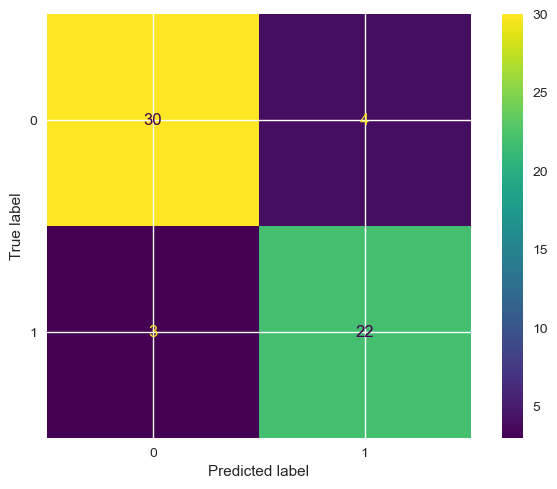

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

##confusion matrix for svm
print(classification_report(y_test, y_test_pred ))
cm_svm = confusion_matrix(y_test, y_test_pred )
ConfusionMatrixDisplay(cm_svm).plot()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {
              'C': np.arange(1,18),
              'kernel': ['rbf'],
              'max_iter':[100,1000]}

grid = GridSearchCV(svm, param_grid=param_grid ,return_train_score=True,cv=5,n_jobs=-1)

# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=10, max_iter=100), n_jobs=-1,
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
                         'kernel': ['rbf'], 'max_iter': [100, 1000]},
             return_train_score=True)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 12, 'kernel': 'rbf', 'max_iter': 100}
SVC(C=12, max_iter=100)


In [ ]:
grid_predictions = grid.predict(X_test)

# print classification report
print(classification_report(y_test, grid_predictions))
SVCAcc = accuracy_score(grid_predictions,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.85      0.88      0.86        25

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59

SVC accuracy: 88.14%


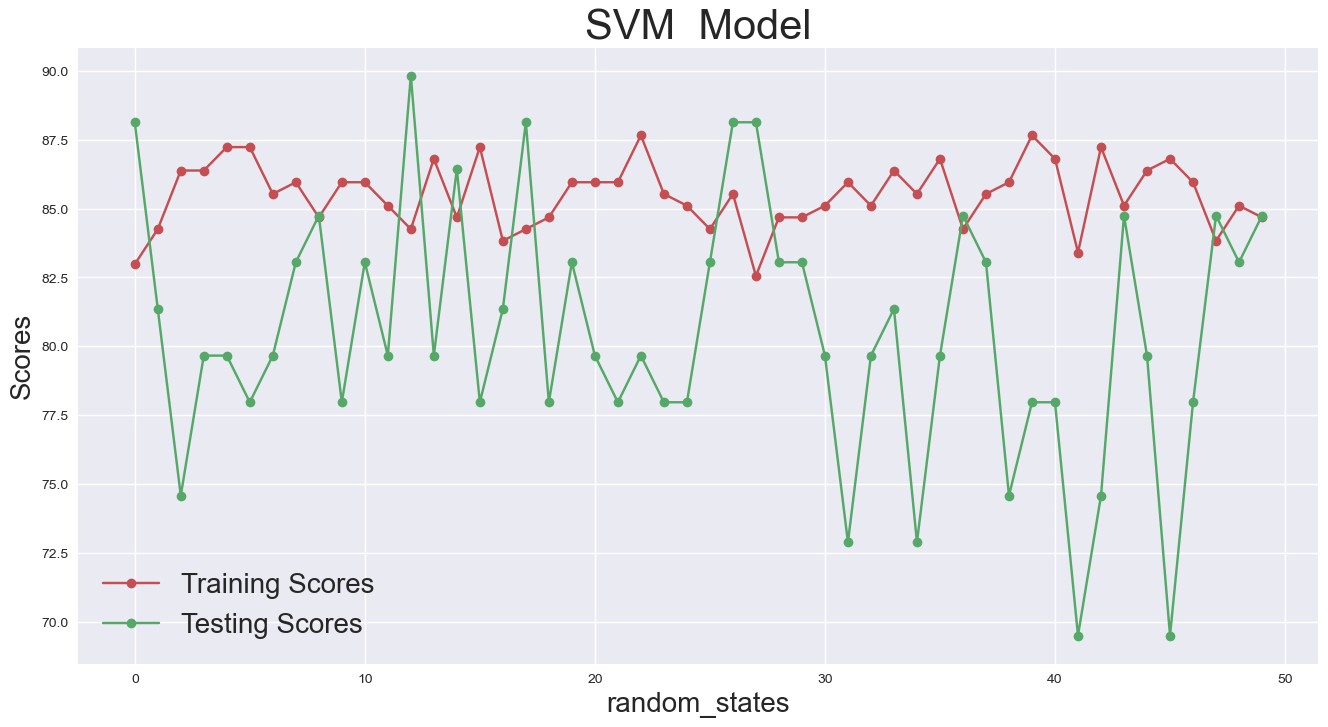

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.svm import SVC
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

train_scores = []
test_scores = []
svm_model_dict = {}
random_states = list(range(50))
for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state)

    svm_model = SVC(kernel='rbf', max_iter=100,C=10)
    svm_model.fit(X_train, y_train)

    train_score = svm_model.score(X_train, y_train) * 100
    test_score = svm_model.score(X_test, y_test) * 100

    svm_model_dict[random_state] = {'Train Score' : train_score, 'Test Score' : test_score}
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize = (16, 8))
plt.plot(random_states, train_scores, 'ro-')
plt.plot(random_states, test_scores, 'go-')
plt.xlabel('random_states', fontsize = 20)
plt.ylabel('Scores', fontsize = 20)
plt.title('SVM  Model', fontsize = 30)
# plt.ylim(0, 100)
plt.legend(labels = ['Training Scores', 'Testing Scores'], fontsize = 20)
# plt.savefig('../images/svm.png')
plt.show()

In [ ]:
# TODO : To know the feature Importances

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

etc.fit(X, y)

print("Percentage Importance of each features with respect to Loan_Status : ")
pd.Series(etc.feature_importances_*100, index = L1.columns[:-1])

Percentage Importance of each features with respect to Loan_Status : 


Dependents                 10.494981
LoanAmount                 22.136979
Loan_Amount_Term            0.000000
Credit_History              0.000000
Gender                      0.000000
Married                    10.455533
Education                   0.000000
Self_Employed               0.000000
Property_Area_Rural         5.888246
Property_Area_Semiurban    17.282635
Property_Area_Urban         7.624254
Loan_Status                26.117373
dtype: float64

In [ ]:
# Loading Test Data
L2 = pd.read_csv('\\Users\\DELL\\Downloads\\loan_test_hidden.csv')


In [ ]:
L2.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002239,Male,No,0,Not Graduate,No,2346,1600.0,132.0,360.0,1.0,Semiurban
1,LP002244,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban
2,LP002250,Male,Yes,0,Graduate,No,5488,0.0,125.0,360.0,1.0,Rural
3,LP002255,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural
4,LP002262,Male,Yes,3+,Graduate,No,9504,0.0,275.0,360.0,1.0,Rural


In [ ]:
#replacing 3+ to 4
L2=L2.replace(to_replace="3+",value=4)
L2["Dependents"].value_counts()
L2['Dependents']=pd.to_numeric(L2['Dependents'])

In [ ]:

L2=L2.drop('Loan_ID',axis=1)
L2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Not Graduate,No,2346,1600.0,132.0,360.0,1.0,Semiurban
1,Male,Yes,0,Graduate,No,2333,2417.0,136.0,360.0,1.0,Urban
2,Male,Yes,0,Graduate,No,5488,0.0,125.0,360.0,1.0,Rural
3,Male,No,4,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural
4,Male,Yes,4,Graduate,No,9504,0.0,275.0,360.0,1.0,Rural
...,...,...,...,...,...,...,...,...,...,...,...
65,Male,Yes,4,Not Graduate,No,2947,1664.0,70.0,180.0,0.0,Urban
66,Male,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban
67,Male,Yes,1,Graduate,Yes,3450,2079.0,162.0,360.0,1.0,Semiurban
68,Male,Yes,1,Not Graduate,No,2653,1500.0,113.0,180.0,0.0,Rural


In [ ]:
L2= pd.get_dummies(L2)


In [ ]:
L2

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,2346,1600.0,132.0,360.0,1.0,0,1,1,0,0,1,1,0,0,1,0
1,0,2333,2417.0,136.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
2,0,5488,0.0,125.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
3,4,9167,0.0,185.0,360.0,1.0,0,1,1,0,1,0,1,0,1,0,0
4,4,9504,0.0,275.0,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,4,2947,1664.0,70.0,180.0,0.0,0,1,0,1,0,1,1,0,0,0,1
66,0,4333,2451.0,110.0,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
67,1,3450,2079.0,162.0,360.0,1.0,0,1,0,1,1,0,0,1,0,1,0
68,1,2653,1500.0,113.0,180.0,0.0,0,1,0,1,0,1,1,0,1,0,0


In [ ]:
# Drop columns
L2 = L2.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate',
              'Self_Employed_No'], axis = 1)


In [ ]:



# Rename columns name
new = {'Gender_Male': 'Gender', 'Married_Yes': 'Married',
       'Education_Graduate': 'Education', 'Self_Employed_Yes': 'Self_Employed',
       }

L2.rename(columns=new, inplace=True)
L2


#-------------------------------------------------------------------------------------------


L2.head().style.background_gradient(axis=0)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,2346,1600.000000,132.000000,360.000000,1.000000,1,0,0,0,0,1,0
1,0,2333,2417.000000,136.000000,360.000000,1.000000,1,1,1,0,0,0,1
2,0,5488,0.000000,125.000000,360.000000,1.000000,1,1,1,0,1,0,0
3,4,9167,0.000000,185.000000,360.000000,1.000000,1,0,1,0,1,0,0
4,4,9504,0.000000,275.000000,360.000000,1.000000,1,1,1,0,1,0,0


In [ ]:
L2.ApplicantIncome = np.sqrt(L2.ApplicantIncome)
L2.CoapplicantIncome = np.sqrt(L2.CoapplicantIncome)
L2.LoanAmount = np.sqrt(L2.LoanAmount)

In [ ]:
# adding a new feature

L2['total_income']=L2['ApplicantIncome']+L2['CoapplicantIncome']


In [ ]:
L2= L2.drop('CoapplicantIncome',axis=1)

L2= L2.drop('ApplicantIncome',axis=1)
L2.head(5)

,Dependents,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,total_income
0,0,11.489125,360.0,1.0,1,0,0,0,0,1,0,88.435524
1,0,11.661904,360.0,1.0,1,1,1,0,0,0,1,97.464133
2,0,11.180340,360.0,1.0,1,1,1,0,1,0,0,74.081037
3,4,13.601471,360.0,1.0,1,0,1,0,1,0,0,95.744452
4,4,16.583124,360.0,1.0,1,1,1,0,1,0,0,97.488461


In [ ]:
L2.values

array([[  0.        ,  11.48912529, 360.        ,   1.        ,
          1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   1.        ,   0.        ,  88.43552415],
       [  0.        ,  11.66190379, 360.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   0.        ,
          0.        ,   0.        ,   1.        ,  97.46413292],
       [  0.        ,  11.18033989, 360.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ,  74.08103671],
       [  4.        ,  13.60147051, 360.        ,   1.        ,
          1.        ,   0.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ,  95.74445154],
       [  4.        ,  16.58312395, 360.        ,   1.        ,
          1.        ,   1.        ,   1.        ,   0.        ,
          1.        ,   0.        ,   0.        ,  97.48846086],
       [  2.        ,  10.63014581,

In [ ]:
L2.shape

(70, 12)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
L2= MinMaxScaler().fit_transform(L2)

In [ ]:
L2.shape

(70, 12)

In [ ]:
# Dropping Records having null values on prediction features

# Predictions
pre= svm_model.predict(L2)

pre

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1], dtype=uint8)

In [ ]:
prediction = pd.DataFrame(pre)


In [ ]:
prediction.to_csv('prediction_ghadaahmed.csv' , index = False)
